# Bundesratswahlen 2018

## Geschichte der BR-Wahlen seit 1848

**Quelle aller Daten: Admin.ch**

Wie viel Bundesräte pro Partei?....

In [2]:
import pandas as pd
import numpy as np
from datetime import datetime
import geopandas as gpd
import matplotlib.pyplot as plt

%matplotlib inline 

In [3]:
from datetime import timedelta

In [4]:
plt.style.use('seaborn')

In [5]:
df = pd.read_csv("BR_OVERVIEW_NEU_1959.csv")

In [6]:
df.head()

,ID,Name,Kanton,Eintritt BR,Austritt BR,Heimatort,ID Heimatort,Gewählt Wahlgang,Gewählt Stimmen,Absolutes Mehr,Stimmen ü aMehr,Partei
0,63,"Petitpierre, Max",NE,14.12.1944,30.06.1961,Neuchâtel+Couvet,NaN,1,122,114,8,FDP
1,68,"Streuli, Hans",ZH,22.12.1953,31.12.1959,Wädenswil+Richterswil,NaN,2,113,109,4,FDP
2,69,"Lepori, Giuseppe",TI,16.12.1954,31.12.1959,Lopagno,NaN,2,128,117,11,CVP
3,70,"Holenstein, Thomas",SG,16.12.1954,31.12.1959,Bütschwil,NaN,1,182,108,74,CVP
4,71,"Chaudet, Paul",VD,16.12.1954,31.12.1966,Corsier s. Vevey,NaN,1,135,110,25,FDP


In [7]:
df.tail()

,ID,Name,Kanton,Eintritt BR,Austritt BR,Heimatort,ID Heimatort,Gewählt Wahlgang,Gewählt Stimmen,Absolutes Mehr,Stimmen ü aMehr,Partei
46,113,"Sommaruga, Simonetta",BE,22.09.2010,02.12.2018,"Lugano, Eggiwil",NaN,4,159,121,38,SP
47,114,"Schneider-Ammann, Johann N.",BE,22.09.2010,02.12.2018,Hasle bei Burgdorf,NaN,5,144,119,25,FDP
48,115,"Berset, Alain",FR,14.12.2011,02.12.2018,Misery-Courtion,NaN,2,126,123,3,SP
49,116,"Parmelin, Guy",VD,09.12.2015,02.12.2018,Bursins,NaN,3,138,119,19,SVP
50,117,"Cassis, Ignazio",TI,20.09.2017,02.12.2018,Sessa,NaN,2,125,123,2,FDP


In [8]:
len(df)

51

In [9]:
df.shape

(51, 12)

## Welcher Kanton hat die meisten Bundesräte

In [10]:
df["Kanton"].value_counts()

ZH    9
BE    6
NE    5
VD    4
TI    4
FR    3
GR    2
GE    2
AG    2
VS    2
LU    2
SG    2
AI    2
SO    2
AR    1
ZG    1
BS    1
OW    1
Name: Kanton, dtype: int64

In [11]:
liste = df["Kanton"].value_counts()

In [12]:
path = "BR_Kanton_1959.csv"

liste.to_csv(path, index=True)

In [13]:
my_title = ("Anzahl Bundesräte pro Kanton seit 1959")

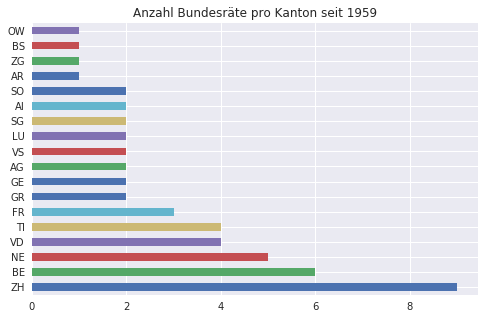

In [14]:
df["Kanton"].value_counts().head(26).plot(kind='barh', figsize=(8,5), title=my_title)

## Wie viele Wahlgänge werden benötigt

In [15]:
df["Gewählt Wahlgang"].value_counts()

1    28
2     8
5     5
3     5
4     3
6     2
Name: Gewählt Wahlgang, dtype: int64

In [16]:
liste = df["Gewählt Wahlgang"].value_counts()

In [17]:
path = "BR_AnzWahlgang_1959.csv"

liste.to_csv(path, index=True)

In [18]:
my_title = ("Wie viele Wahlgänge wurden zur Wahl benötigt?")

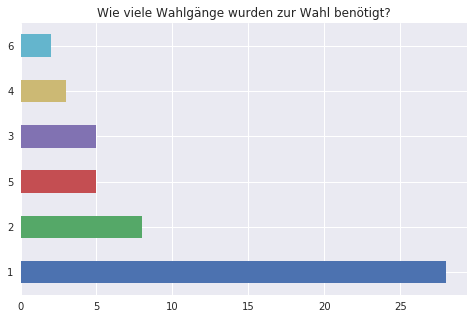

In [19]:
df["Gewählt Wahlgang"].value_counts().head(10).plot(kind='barh', figsize=(8,5), title=my_title)

## Wie viele Bundesräte pro Partei

In [20]:
df["Partei"].value_counts()

FDP    17
CVP    13
SP     12
SVP     7
BDP     2
Name: Partei, dtype: int64

In [21]:
my_title = ("Wie viele Bundesräte pro Partei?")

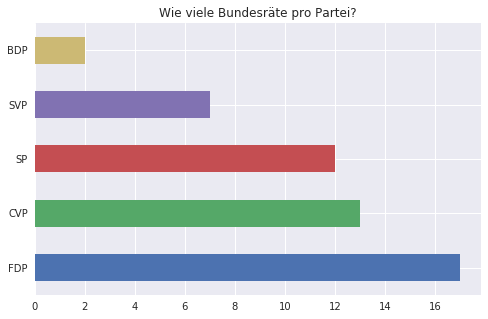

In [22]:
df["Partei"].value_counts().head(10).plot(kind='barh', figsize=(8,5), title=my_title)

## Wer wurde mit Glanzresultat gewählt

In [23]:
df.groupby("Name")["Stimmen ü aMehr"].sum().sort_values(ascending=False).head(3)

Name
Graber, Pierre        77
Holenstein, Thomas    74
Aubert, Pierre        73
Name: Stimmen ü aMehr, dtype: int64

In [24]:
liste = df.groupby("Name")["Stimmen ü aMehr"].sum().sort_values(ascending=False).head(20)

In [25]:
path = "BR_Stimmen_ü_aMehr_1959.csv"

liste.to_csv(path, index=True)

In [26]:
my_title = ("Wer wurde mit Glanzresultat gewählt?")

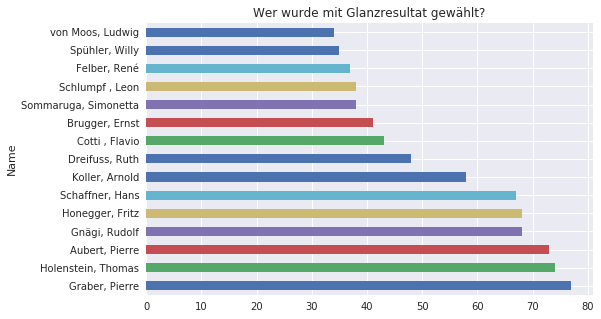

In [27]:
df.groupby("Name")["Stimmen ü aMehr"].sum().sort_values(ascending=False).head(15).plot(kind='barh', figsize=(8,5), title=my_title)

## Wer knapp über dem absoluten Mehr

In [28]:
df.groupby("Name")["Stimmen ü aMehr"].sum().sort_values(ascending=False).tail(20)

Name
Burkhalter, Didier            9
Delamuraz, Jean-Pascal        9
Wahlen, Friedrich Traugott    9
Petitpierre, Max              8
Friedrich, Rudolf             7
Merz, Hans-Rudolf             7
Villiger, Kaspar              6
Streuli, Hans                 4
Schmid, Samuel                4
Berset, Alain                 3
Metzler-Arnold, Ruth          3
Widmer-Schlumpf, Eveline      3
Kopp, Elisabeth               3
Cassis, Ignazio               2
Ritschard, Willi              2
Blocher, Christoph            2
Egli, Alphons                 2
Stich, Otto                   1
Maurer, Ueli                  0
Deiss, Joseph                 0
Name: Stimmen ü aMehr, dtype: int64

In [29]:
my_title = ("Wer rutschte knapp in den Bundesrat?")

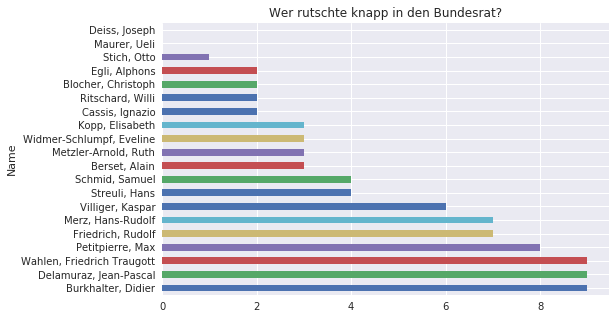

In [30]:
df.groupby("Name")["Stimmen ü aMehr"].sum().sort_values(ascending=False).tail(20).plot(kind='barh', figsize=(8,5), title=my_title)

## Übersicht über Parteien und Anzahl Wahlgänge

In [31]:
df.groupby("Partei")["Gewählt Wahlgang"].value_counts(ascending= False).head(30)

Partei  Gewählt Wahlgang
BDP     2                    1
        6                    1
CVP     1                    9
        2                    1
        4                    1
        5                    1
        6                    1
FDP     1                   11
        2                    3
        5                    2
        4                    1
SP      1                    6
        3                    2
        5                    2
        2                    1
        4                    1
SVP     3                    3
        1                    2
        2                    2
Name: Gewählt Wahlgang, dtype: int64

In [32]:
df.groupby("Name")["Gewählt Wahlgang"].sum().sort_values(ascending= False).head(5)

Name
Schmid, Samuel                 6
Deiss, Joseph                  6
Schneider-Ammann, Johann N.    5
Couchepin, Pascal              5
Calmy-Rey, Micheline           5
Name: Gewählt Wahlgang, dtype: int64

## Übersicht über Parteien und Stimmen über absolutem Mehr


In [33]:
df.groupby("Stimmen ü aMehr")["Partei"].value_counts(ascending=False).head(120)

Stimmen ü aMehr  Partei
0                CVP       1
                 SVP       1
1                SP        1
2                CVP       1
                 FDP       1
                 SP        1
                 SVP       1
3                BDP       1
                 CVP       1
                 FDP       1
                 SP        1
4                BDP       1
                 FDP       1
6                FDP       1
7                FDP       2
8                FDP       1
9                FDP       2
                 SVP       1
10               CVP       1
11               CVP       1
                 SVP       1
13               SP        1
15               CVP       1
16               FDP       1
17               CVP       2
18               SP        1
19               FDP       1
                 SVP       1
25               FDP       2
26               FDP       1
28               CVP       1
31               SP        1
34               CVP       1
35               SP

## Wer war am längsten Bundesrat, wer am wenigsten lang

In [34]:
df["Eintritt neu"] = pd.to_datetime(df["Eintritt BR"], format="%d.%m.%Y")

In [35]:
df['Austritt neu'] = pd.to_datetime(df['Austritt BR'], format="%d.%m.%Y")

In [36]:
df.head()

,ID,Name,Kanton,Eintritt BR,Austritt BR,Heimatort,ID Heimatort,Gewählt Wahlgang,Gewählt Stimmen,Absolutes Mehr,Stimmen ü aMehr,Partei,Eintritt neu,Austritt neu
0,63,"Petitpierre, Max",NE,14.12.1944,30.06.1961,Neuchâtel+Couvet,NaN,1,122,114,8,FDP,1944-12-14,1961-06-30
1,68,"Streuli, Hans",ZH,22.12.1953,31.12.1959,Wädenswil+Richterswil,NaN,2,113,109,4,FDP,1953-12-22,1959-12-31
2,69,"Lepori, Giuseppe",TI,16.12.1954,31.12.1959,Lopagno,NaN,2,128,117,11,CVP,1954-12-16,1959-12-31
3,70,"Holenstein, Thomas",SG,16.12.1954,31.12.1959,Bütschwil,NaN,1,182,108,74,CVP,1954-12-16,1959-12-31
4,71,"Chaudet, Paul",VD,16.12.1954,31.12.1966,Corsier s. Vevey,NaN,1,135,110,25,FDP,1954-12-16,1966-12-31


In [37]:
# df["Zeitspanne"] =df["Eintritt neu"]-df["Austritt neu"]

In [38]:
df["Zeitspanne"] = pd.Series(delta.days for delta in (df['Austritt neu'] - df['Eintritt neu']))

In [39]:
df.head()

,ID,Name,Kanton,Eintritt BR,Austritt BR,Heimatort,ID Heimatort,Gewählt Wahlgang,Gewählt Stimmen,Absolutes Mehr,Stimmen ü aMehr,Partei,Eintritt neu,Austritt neu,Zeitspanne
0,63,"Petitpierre, Max",NE,14.12.1944,30.06.1961,Neuchâtel+Couvet,NaN,1,122,114,8,FDP,1944-12-14,1961-06-30,6042
1,68,"Streuli, Hans",ZH,22.12.1953,31.12.1959,Wädenswil+Richterswil,NaN,2,113,109,4,FDP,1953-12-22,1959-12-31,2200
2,69,"Lepori, Giuseppe",TI,16.12.1954,31.12.1959,Lopagno,NaN,2,128,117,11,CVP,1954-12-16,1959-12-31,1841
3,70,"Holenstein, Thomas",SG,16.12.1954,31.12.1959,Bütschwil,NaN,1,182,108,74,CVP,1954-12-16,1959-12-31,1841
4,71,"Chaudet, Paul",VD,16.12.1954,31.12.1966,Corsier s. Vevey,NaN,1,135,110,25,FDP,1954-12-16,1966-12-31,4398


In [40]:
versuch = df["Zeitspanne"] / 365

In [41]:
df.groupby("Name")["Zeitspanne"].sum().sort_values(ascending=False).head(20)

Name
Petitpierre, Max            6042
Leuenberger, Moritz         5513
Furgler, Kurt               5502
Villiger, Kaspar            5446
Delamuraz, Jean-Pascal      5228
Gnägi, Rudolf               5136
Tschudi, Hans-Peter         5128
Ogi , Adolf                 4771
Leuthard, Doris             4554
Koller, Arnold              4524
Cotti , Flavio              4524
Chaudet, Paul               4398
von Moos, Ludwig            4397
Stich, Otto                 4346
Couchepin, Pascal           4252
Bonvin, Roger               4113
Spühler, Willy              3698
Chevallaz, Georges-André    3678
Aubert, Pierre              3676
Maurer, Ueli                3644
Name: Zeitspanne, dtype: int64

In [42]:
liste = df.groupby("Name")["Zeitspanne"].sum().sort_values(ascending=False).head(120)

In [43]:
path = "BR_am_langsten_Amt_1959.csv"

liste.to_csv(path, index=True)

In [44]:
my_title = ("Welcher BR war am längsten im Amt?")

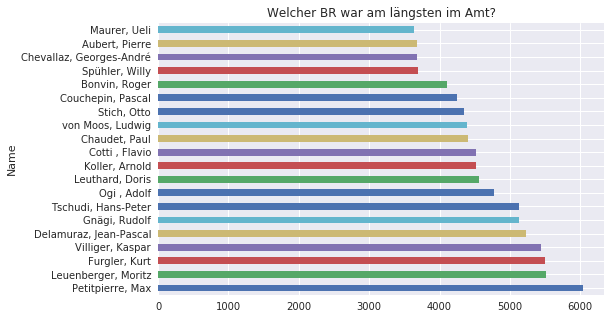

In [45]:
df.groupby("Name")["Zeitspanne"].sum().sort_values(ascending=False).head(20).plot(kind='barh', figsize=(8,5), title=my_title)

In [46]:
df.groupby("Name")["Zeitspanne"].sum().sort_values(ascending=False).tail(30)

Name
Dreifuss, Ruth                 3583
Calmy-Rey, Micheline           3314
Hürlimann, Hans                3313
Schaffner, Hans                3121
Schneider-Ammann, Johann N.    2993
Sommaruga, Simonetta           2993
Brugger, Ernst                 2974
Graber, Pierre                 2974
Burkhalter, Didier             2967
Schlumpf , Leon                2948
Schmid, Samuel                 2947
Widmer-Schlumpf, Eveline       2941
Deiss, Joseph                  2699
Wahlen, Friedrich Traugott     2577
Celio, Nello                   2574
Berset, Alain                  2545
Merz, Hans-Rudolf              2517
Streuli, Hans                  2200
Felber, René                   1939
Honegger, Fritz                1850
Holenstein, Thomas             1841
Lepori, Giuseppe               1841
Metzler-Arnold, Ruth           1756
Kopp, Elisabeth                1563
Egli, Alphons                  1484
Blocher, Christoph             1482
Parmelin, Guy                  1089
Bourgknecht, Jean      

In [47]:
my_title= ("Wer verliess den BR am Schnellsten wieder?")

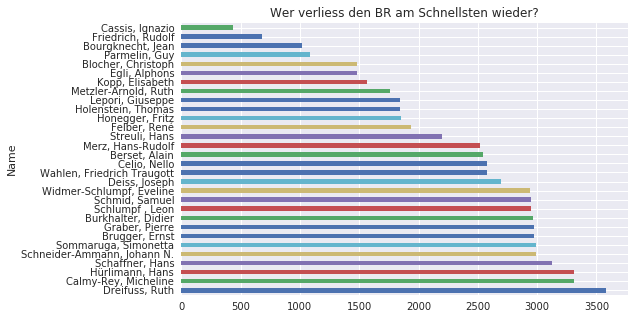

In [48]:
df.groupby("Name")["Zeitspanne"].sum().sort_values(ascending=False).tail(30).plot(kind='barh', figsize=(8,5), title=my_title)

In [ ]:
# Python3 code to convert given  
# number of days in terms of  
# Years, Weeks and Days 
  
DAYS_IN_WEEK = 7
  
# Function to find  
# year, week, days  
def find( number_of_days ): 
  
    # Assume that years is 
    # of 365 days 
    year = int(number_of_days / 365) 
    week = int((number_of_days % 365) / 
                DAYS_IN_WEEK) 
    days = (number_of_days % 365) % DAYS_IN_WEEK 
      
    print("years = ",year, 
          "\nweeks = ",week, 
          "\ndays = ",days) 
      
# Driver Code 
number_of_days = 200
find(number_of_days) 